**` ELEVVO Task 1: Student Score Prediction`**

# **Data** **Preprocessing**

##Import Libraries

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

##Import dataset

In [96]:
dataset = pd.read_csv("/content/StudentPerformanceFactors.csv")


## **Data Cleaning**

### **Taking care of missing data**

###Counting Missing data

In [97]:
missing_data = dataset.isnull().sum()
print(missing_data)
print(dataset.shape)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
(6607, 20)


### Drop missing data

In [98]:
#drop: bc small missing data
dataset.dropna(inplace=True)
print("Dataset shape after dropping missing values:", dataset.shape)

Dataset shape after dropping missing values: (6378, 20)


In [99]:
# Download the modified dataset as a CSV file
dataset.to_csv('noMissing_data.csv', index=False)
files.download('noMissing_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

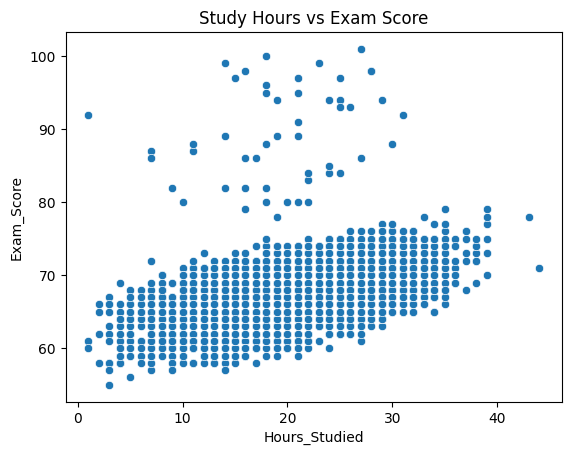

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=dataset)
plt.title('Study Hours vs Exam Score')
plt.show()

##**Encoding categorical data**

###Encoding the Independent Variable

In [101]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Columns to encode (multi-class categorical)
categorical_columns = [2, 3, 7, 10, 11, 13, 16, 17]

# Build ColumnTransformer with OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop=None, sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  # keep numeric and other columns
)

# Fit and transform
X = ct.fit_transform(dataset)

# Get the new column names
ohe_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(dataset.columns[categorical_columns])

# Combine OHE names + remainder column names
new_columns = list(ohe_feature_names) + [col for i, col in enumerate(dataset.columns) if i not in categorical_columns]

# Create DataFrame with new column names
encoded_df = pd.DataFrame(X, columns=new_columns)

# Display the DataFrame with correct column names
#display(encoded_df)

In [102]:
encoded_df.to_csv('encoded_categorical.csv', index=False)
files.download('encoded_categorical.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Encoding label data

In [103]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Extracurricular_Activities', 'Internet_Access',
               'Learning_Disabilities', 'Gender', 'School_Type']

for col in binary_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    print(encoded_df[col])

# Display the DataFrame with correct column names after label encoding
display(encoded_df)

0       0
1       0
2       1
3       1
4       1
       ..
6373    0
6374    0
6375    1
6376    1
6377    1
Name: Extracurricular_Activities, Length: 6378, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
6373    1
6374    1
6375    1
6376    1
6377    1
Name: Internet_Access, Length: 6378, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
6373    0
6374    0
6375    0
6376    0
6377    0
Name: Learning_Disabilities, Length: 6378, dtype: int64
0       1
1       0
2       1
3       1
4       0
       ..
6373    0
6374    0
6375    0
6376    0
6377    1
Name: Gender, Length: 6378, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
6373    1
6374    1
6375    1
6376    0
6377    1
Name: School_Type, Length: 6378, dtype: int64


,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_High,...,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,7,73,1,0,1,3,0,1,67
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,8,59,1,2,1,4,0,0,61
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,7,91,1,2,1,4,0,1,74
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,8,98,1,1,1,4,0,1,71
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,6,65,1,3,1,4,0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,7,76,1,1,1,2,0,0,68
6374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,8,81,1,3,1,2,0,0,69
6375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,6,65,1,3,1,2,0,0,68
6376,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,6,91,1,2,0,3,0,0,68


In [104]:
encoded_df.to_csv('encoded_label.csv', index=False)
files.download('encoded_label.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

check difference

In [105]:
#display(dataset)
#display(encoded_df)

###**Splitting Data**

In [106]:
from sklearn.model_selection import train_test_split

# Ensure encoded_df is updated with label encoded columns before splitting
X = encoded_df.iloc[:, :-1].values
y = encoded_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [107]:
encoded_df.to_csv('encoded_label.csv', index=False)
files.download('encoded_label.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###**Feature Scaling**




In [108]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Columns to apply feature scaling (excluding the target variable 'Exam_Score')
feature_scaling_cols = ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']

# Get the indices of these columns
all_feature_cols = [col for col in encoded_df.columns if col != 'Exam_Score']
feature_indices_to_scale = [all_feature_cols.index(col) for col in feature_scaling_cols if col in all_feature_cols]

sc = StandardScaler()

# Ensure X_train and X_test are NumPy arrays here for this indexing to work
X_train[:, feature_indices_to_scale] = sc.fit_transform(X_train[:, feature_indices_to_scale])
X_test[:, feature_indices_to_scale] = sc.transform(X_test[:, feature_indices_to_scale])

#print("X_train after scaling:")
#print(X_train[:5]) # Display first 5 rows to check scaling
#print("\nX_test after scaling:")
#print(X_test[:5]) # Display first 5 rows to check scaling

### Save splitted data in csv

In [109]:
encoded_df_from_csv = pd.read_csv('encoded_label.csv')
# Generate the list of all feature columns by excluding the target variable 'Exam_Score'
all_feature_cols = [col for col in encoded_df_from_csv.columns if col != 'Exam_Score']

print("All feature columns:")
print(all_feature_cols)

All feature columns:
['Parental_Involvement_High', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_High', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Motivation_Level_High', 'Motivation_Level_Low', 'Motivation_Level_Medium', 'Family_Income_High', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_High', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Peer_Influence_Negative', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Parental_Education_Level_College', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Far', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near', 'Hours_Studied', 'Attendance', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Internet_Access', 'Tutoring_Sessions', 'School_Type', 'Physical_Activity', 'Learning_Disabilities', 'Gender']


In [110]:
import pandas as pd
from google.colab import files

# Convert X_train NumPy array to a pandas DataFrame before saving
X_train_df = pd.DataFrame(X_train, columns=all_feature_cols)
X_train_df.to_csv('X_train.csv', index=False)
files.download('X_train.csv')

X_test_df = pd.DataFrame(X_test, columns=all_feature_cols)
X_test_df.to_csv('X_test.csv', index=False)
files.download('X_test.csv')

y_train_df = pd.DataFrame(y_train, columns=['Exam_Score'])
y_train_df.to_csv('y_train.csv', index=False)
files.download('y_train.csv')

y_test_df = pd.DataFrame(y_test, columns=['Exam_Score'])
y_test_df.to_csv('y_test.csv', index=False)
files.download('y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Visualisations**

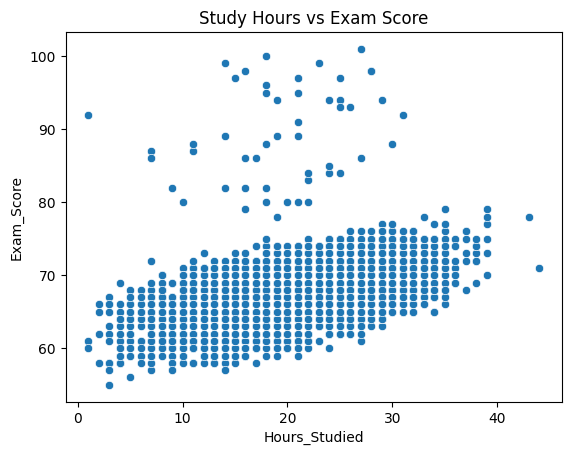

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=dataset)
plt.title('Study Hours vs Exam Score')
plt.show()

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


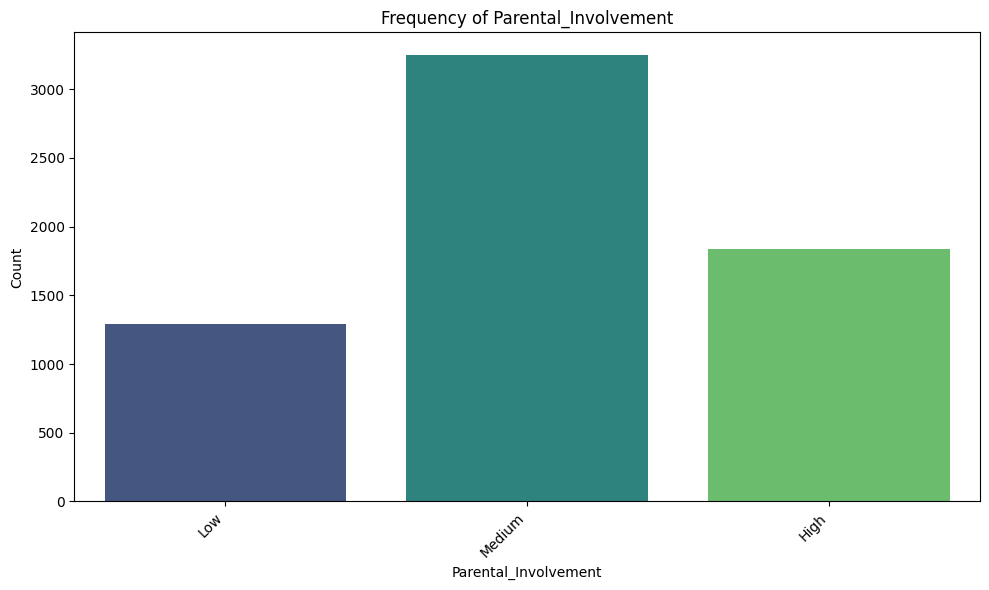

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


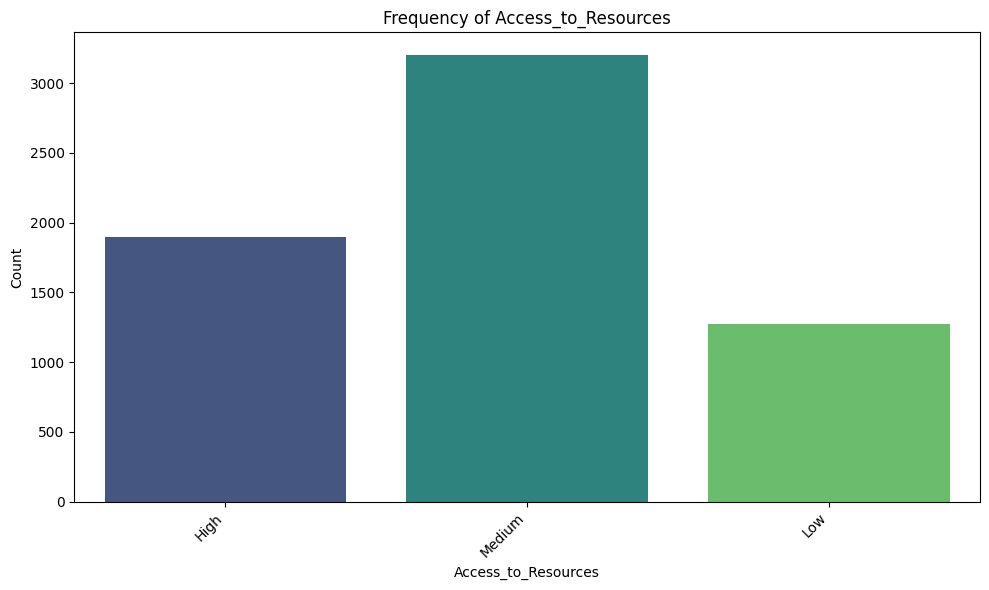

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


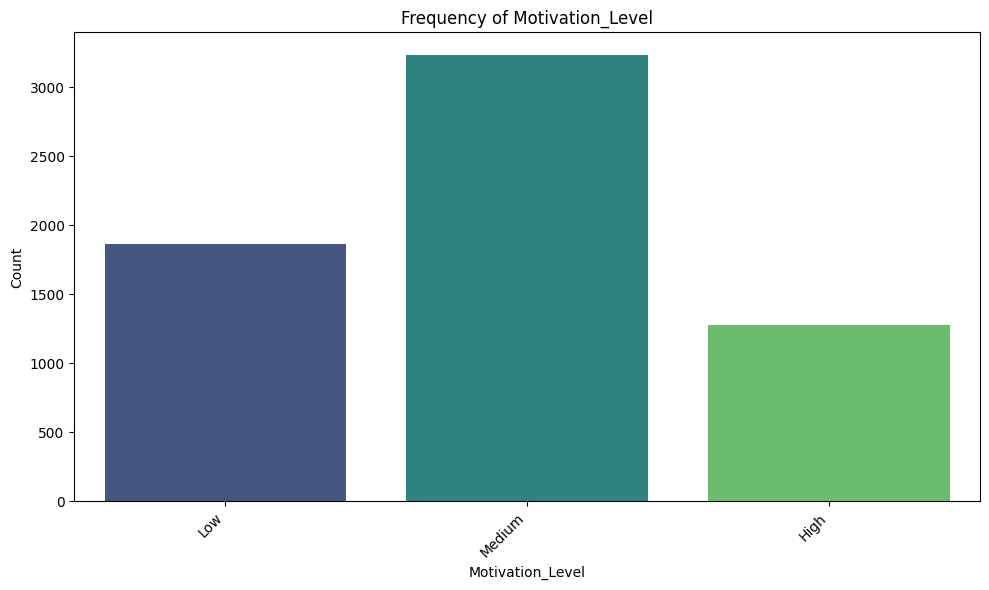

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


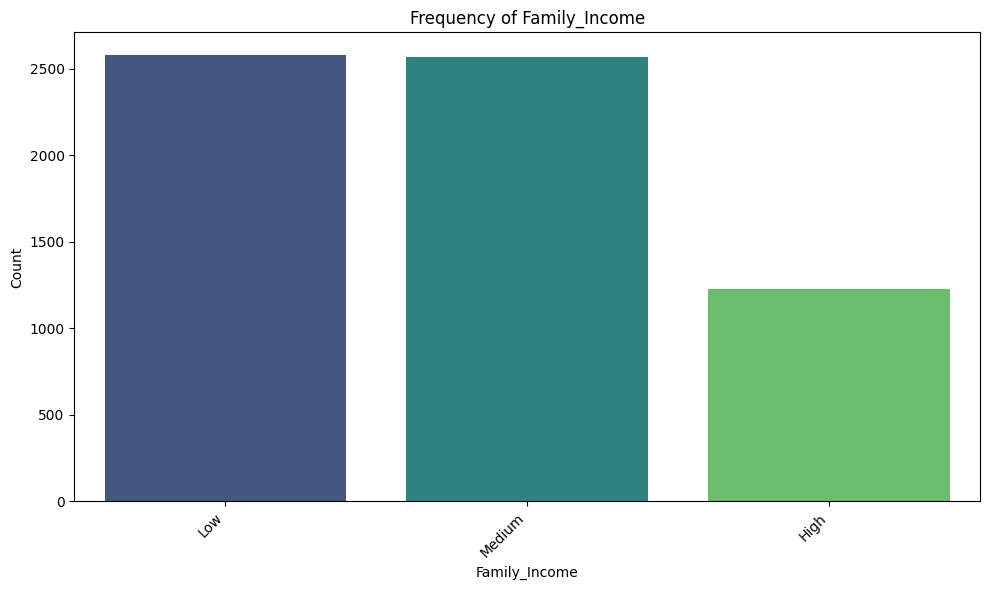

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


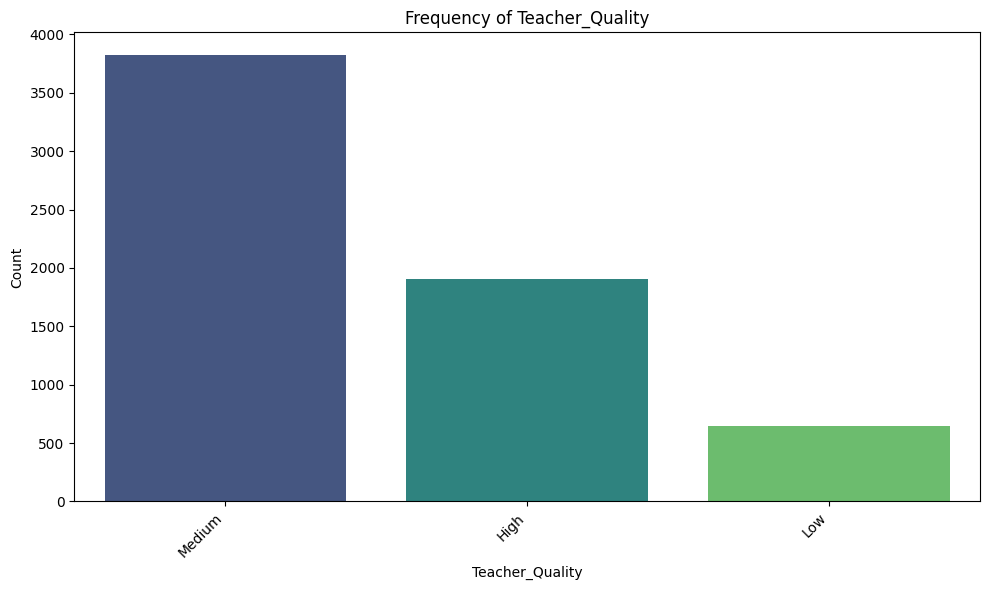

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


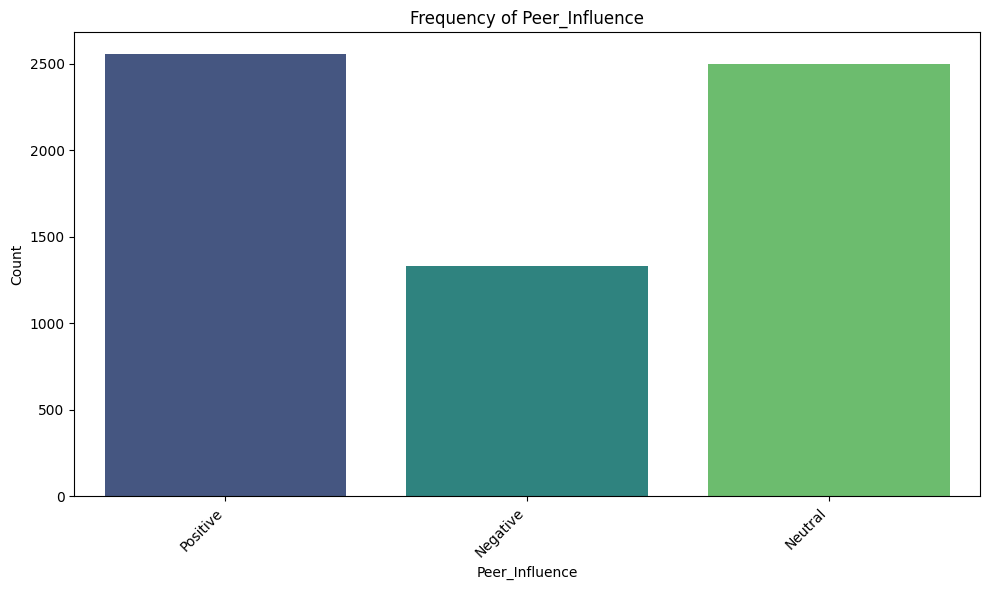

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


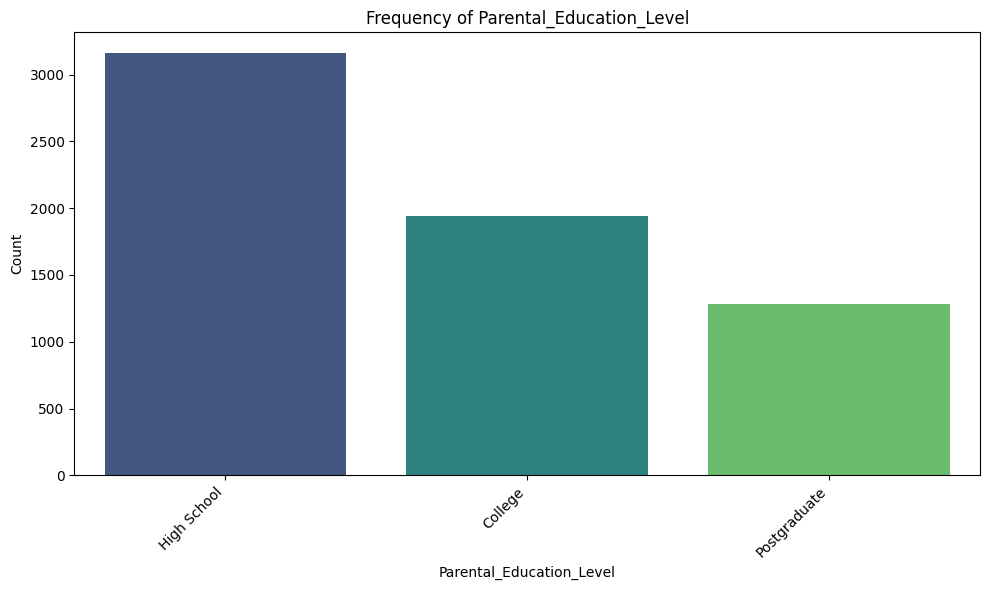

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


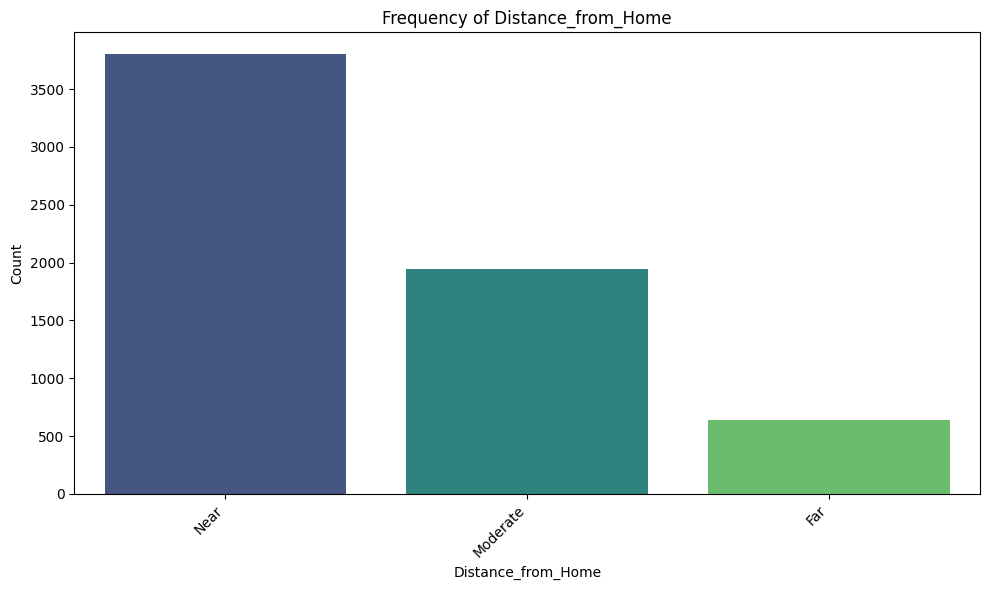

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


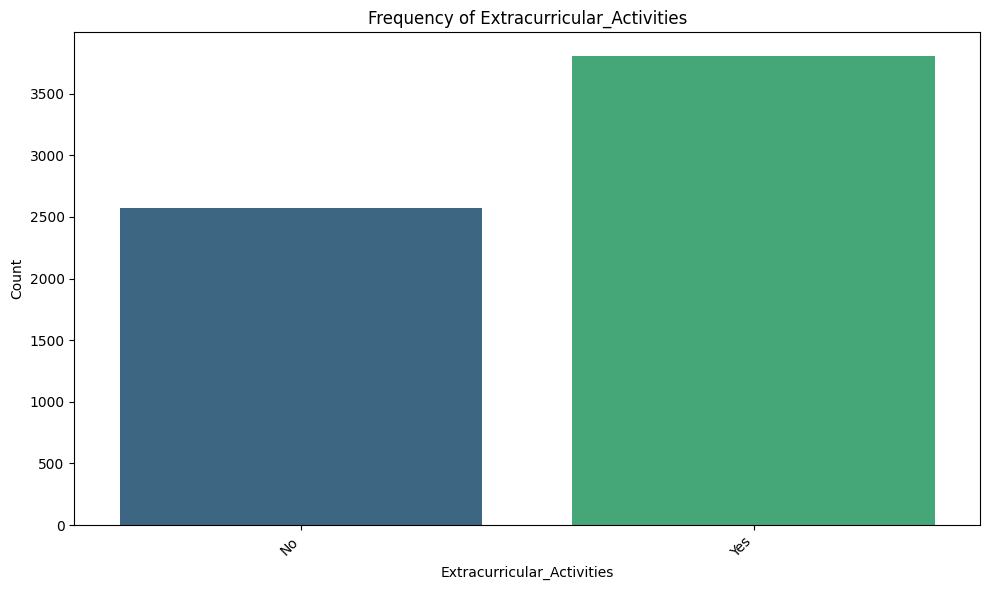

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


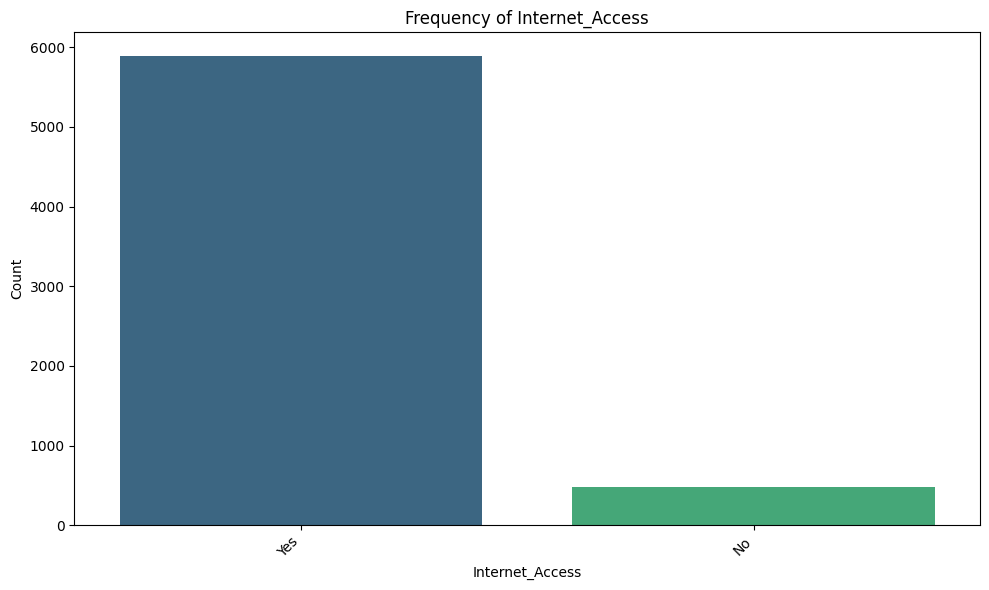

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


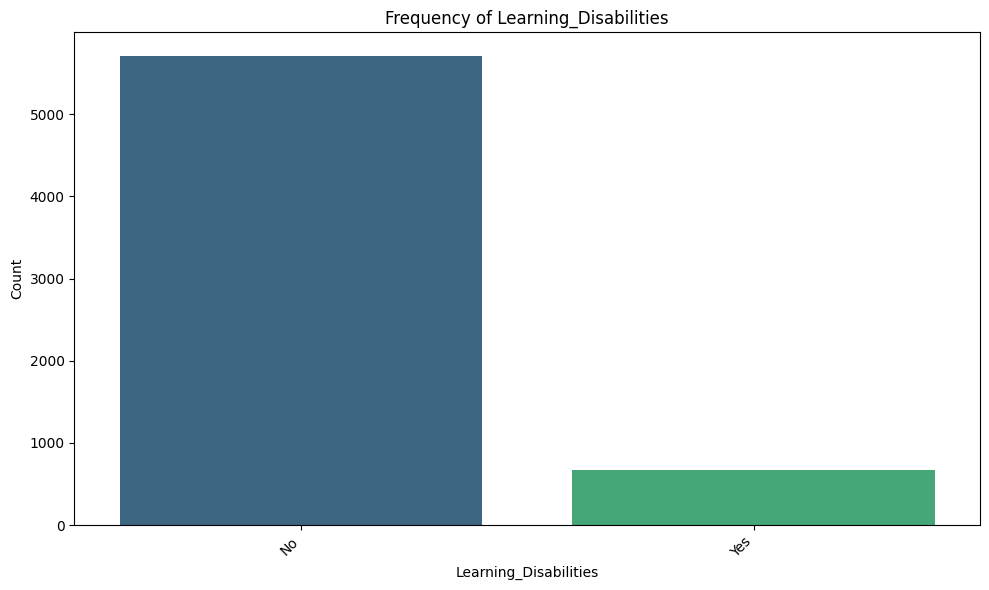

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


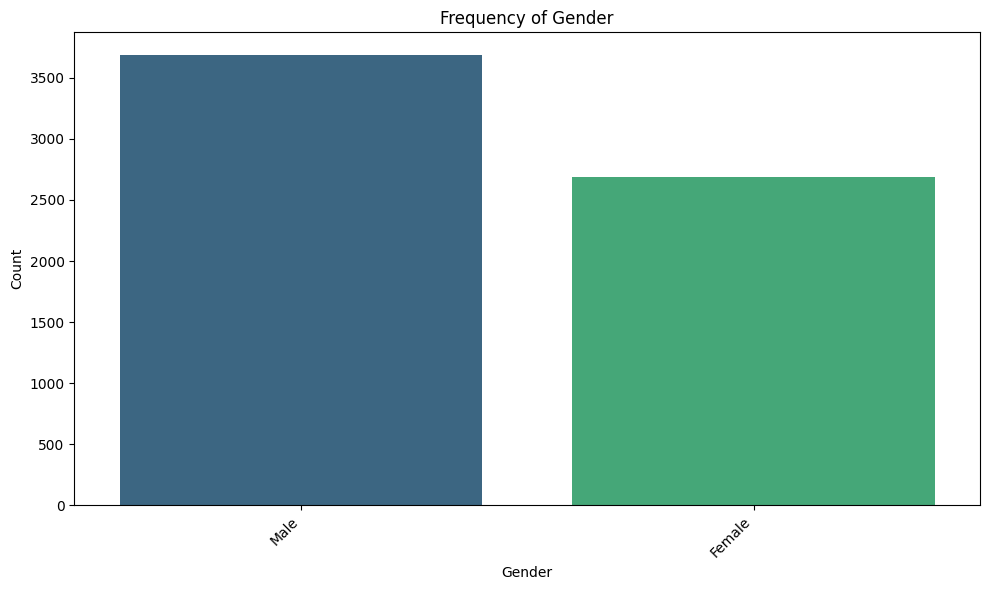

/tmp/ipython-input-3533807400.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='viridis')


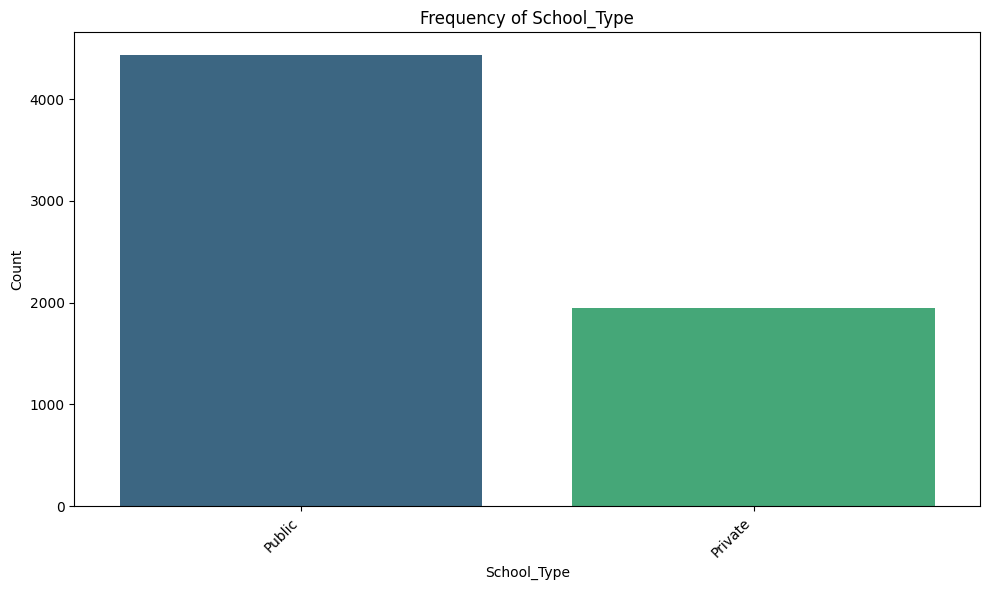

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify original categorical columns
original_categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home', 'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'Gender', 'School_Type']

# Create count plots for each original categorical column
for col in original_categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=col, palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Analyze relationships between features and the target variable



**Reasoning**:
Create scatter plots for selected numerical features against 'Exam_Score' and box plots for selected categorical features against 'Exam_Score' to visualize their relationships with the target variable.



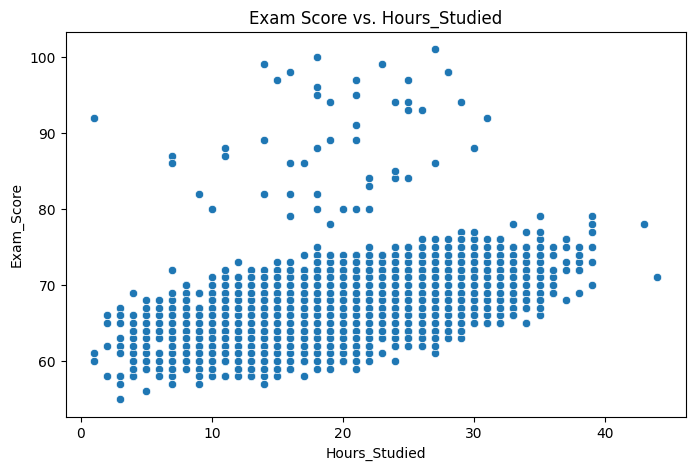

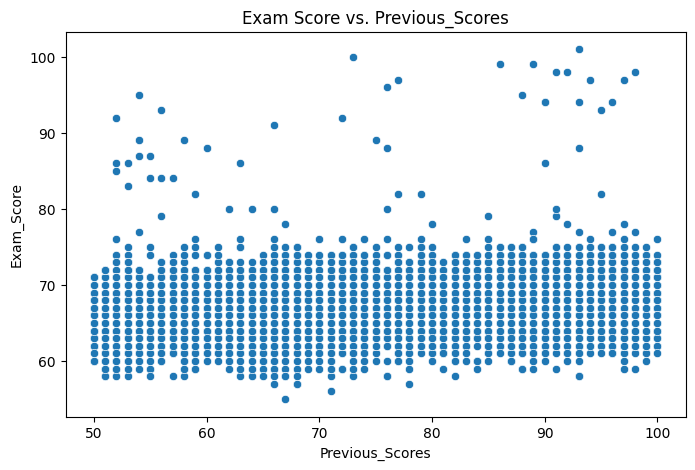

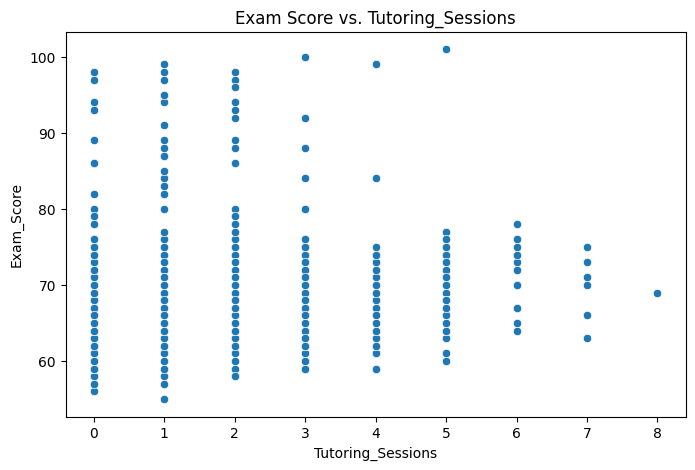

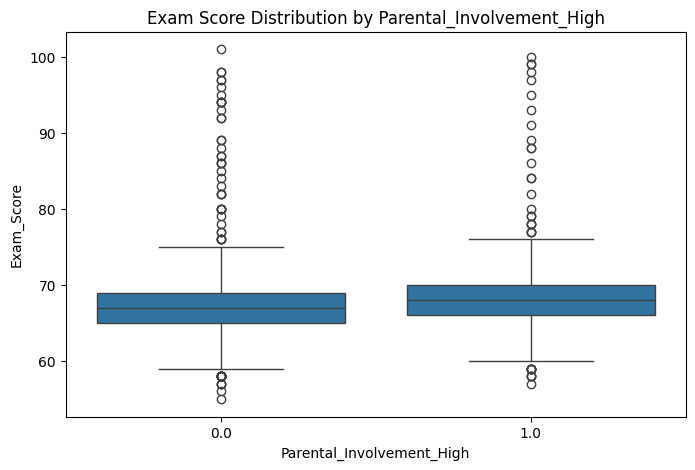

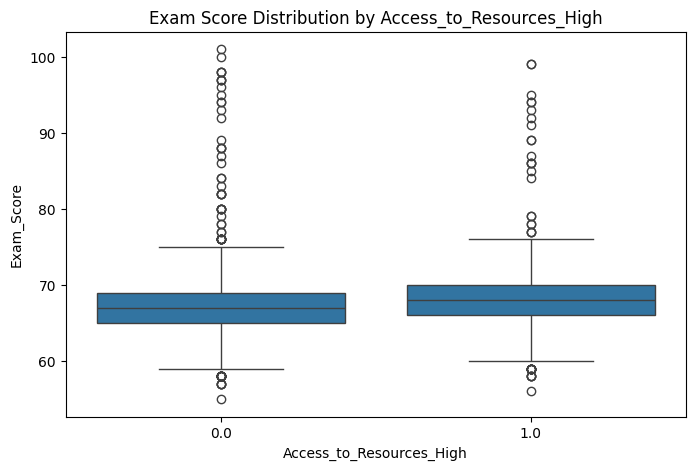

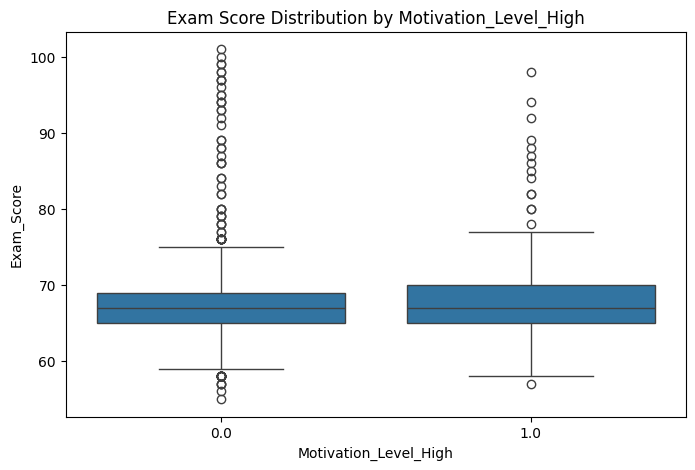

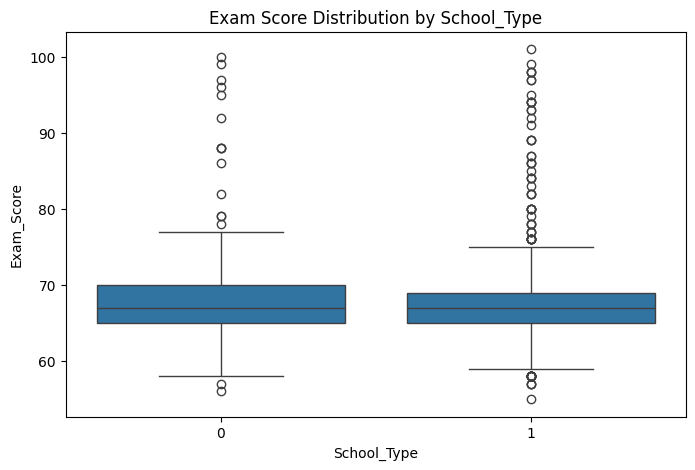

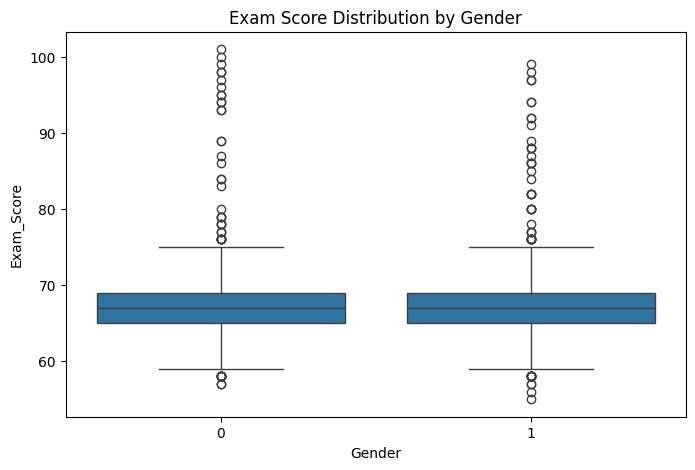

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the encoded dataset
encoded_df = pd.read_csv('encoded_label.csv')

# 1. Create scatter plots for selected numerical features vs. Exam_Score
numerical_features_to_plot = ['Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions']

for col in numerical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=encoded_df, x=col, y='Exam_Score')
    plt.title(f'Exam Score vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.show()

# 2. Create box plots or violin plots for selected categorical features vs. Exam_Score
categorical_features_to_plot = [
    'Parental_Involvement_High', 'Access_to_Resources_High',
    'Motivation_Level_High', 'School_Type', 'Gender'
]

for col in categorical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=encoded_df, x=col, y='Exam_Score')
    plt.title(f'Exam Score Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.show()

### Explore relationships between features



**Reasoning**:
Select numerical features, generate a pair plot, calculate the correlation matrix, and create a heatmap to visualize feature relationships.



Generating Pair Plot...


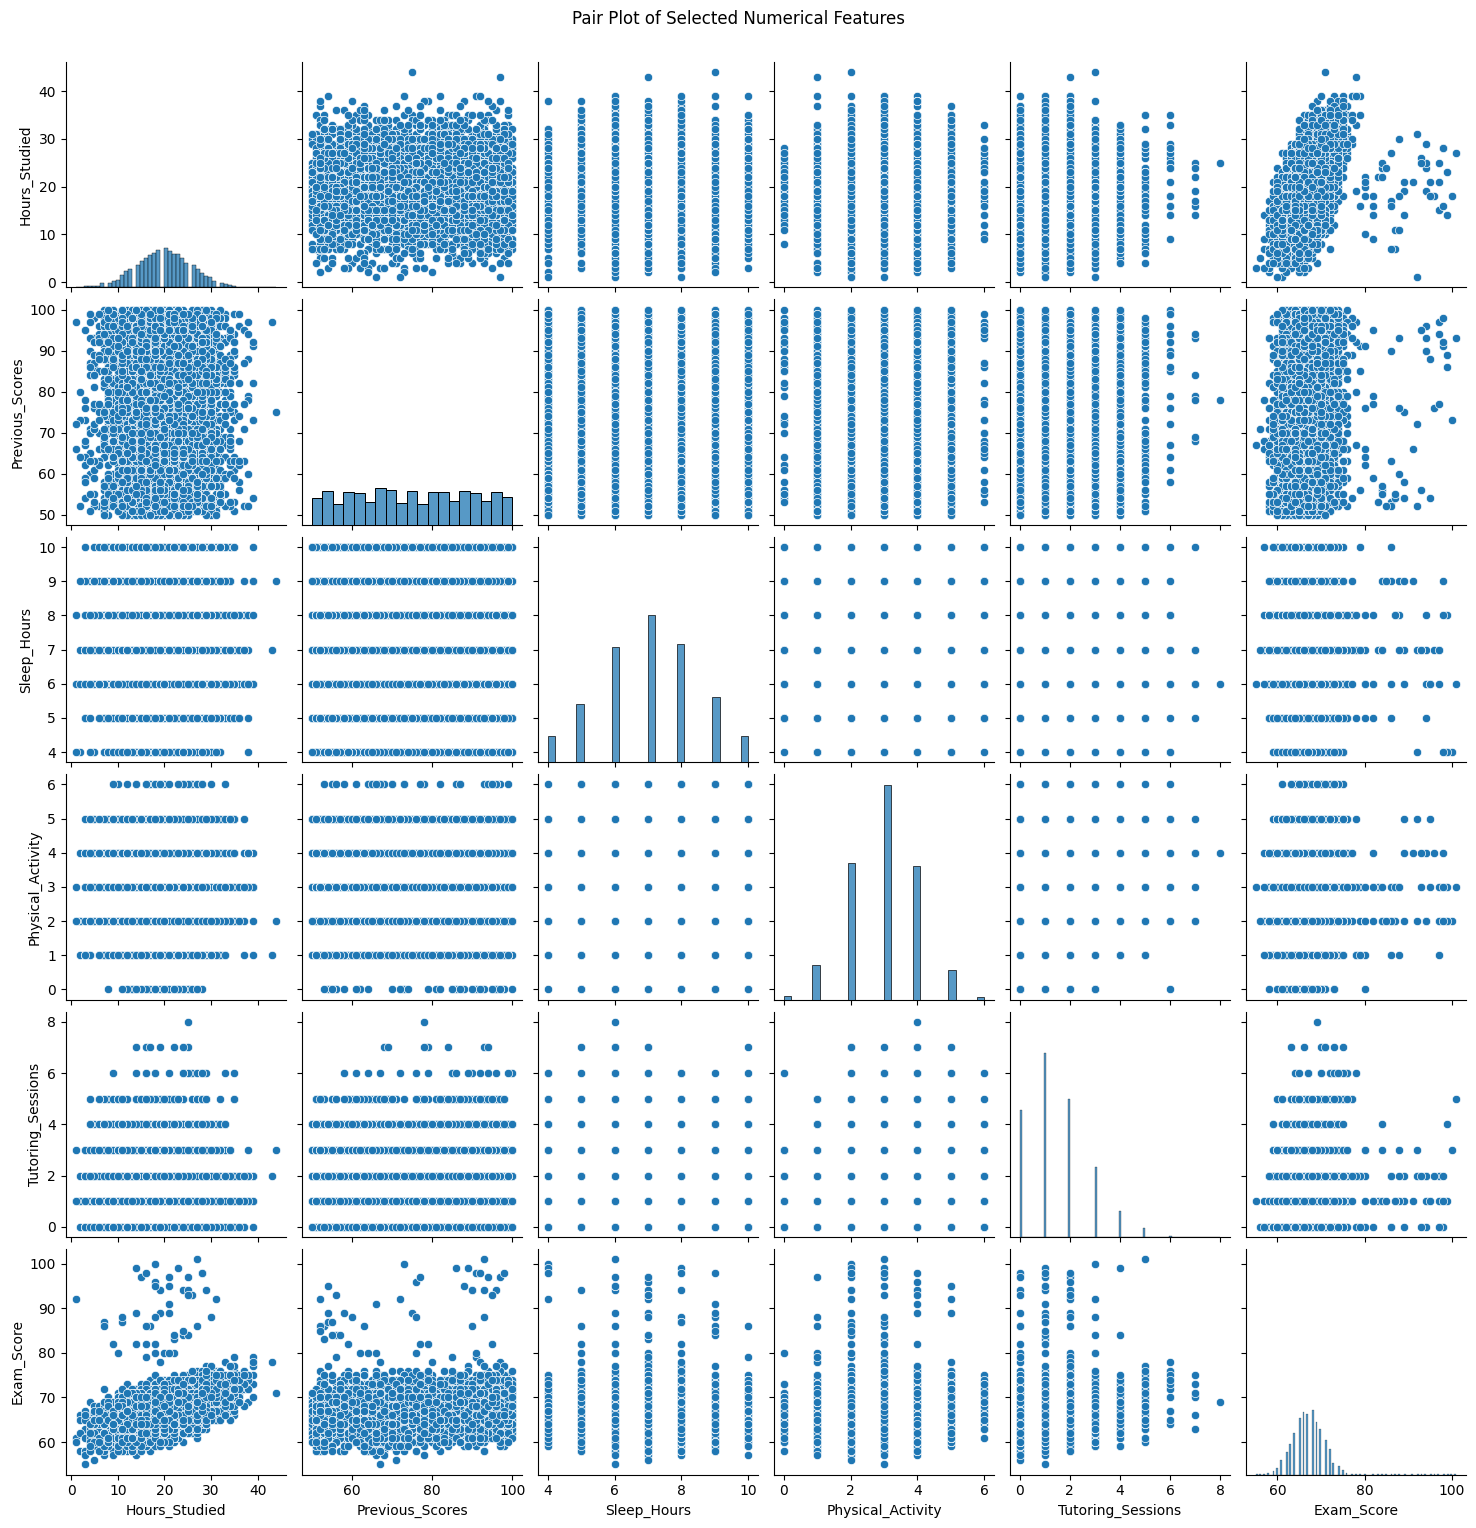

Pair Plot Generated.


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the encoded dataset
encoded_df = pd.read_csv('encoded_label.csv')

numerical_features_for_pairplot = [
    'Hours_Studied',
    'Previous_Scores',
    'Sleep_Hours',
    'Physical_Activity',
    'Tutoring_Sessions',
    'Exam_Score' # Include the target variable as well
]
# Ensure selected columns exist in the DataFrame
numerical_features_for_pairplot = [col for col in numerical_features_for_pairplot if col in encoded_df.columns]

# 2. Generate a pair plot using the selected numerical features
print("Generating Pair Plot...")
sns.pairplot(encoded_df[numerical_features_for_pairplot])
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02) # Add a title
plt.show()
print("Pair Plot Generated.")

# 3. Calculate the correlation matrix for all numerical and scaled numerical features
# All columns in encoded_df are now numerical (either original numerical, one-hot encoded 0/1, or label encoded 0/1).
correlation_matrix = encoded_df.corr()


# **Training the SLR model**

In [115]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predict the exam scores on the test set using the trained**

In [116]:
y_pred = regressor.predict(X_test)
y_pred

array([68.89722165, 63.20007919, 67.07785195, ..., 69.76847157,
       74.39540747, 70.60984893])

**Download all y_predict into csv**

In [117]:
# Convert the predicted values (y_pred) to a pandas DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Exam_Score'])
y_pred_df.to_csv('y_pred_test.csv', index=False)
files.download('y_pred_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Visualising the Training set results**

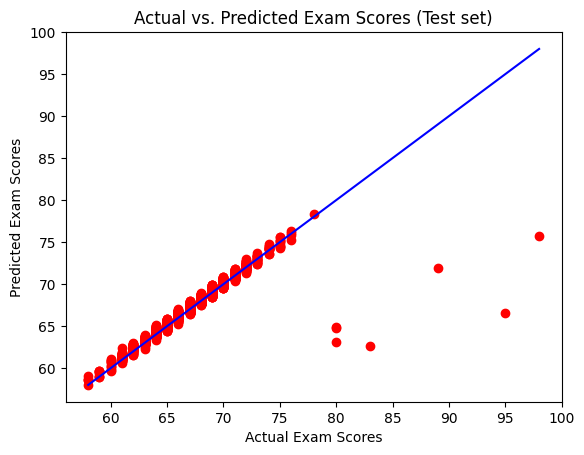

In [118]:
import matplotlib.pyplot as plt

# Visualize the results by plotting actual vs. predicted values for the test set
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Actual vs. Predicted Exam Scores (Test set)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
# Add a line representing perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue')
plt.show()

**Visualising the Test set results**

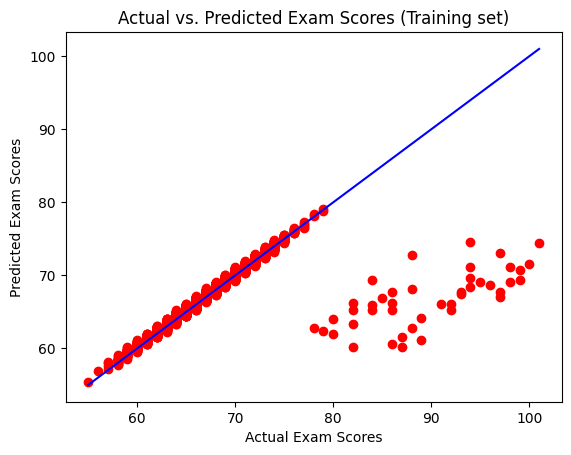

In [120]:
# Visualize the results by plotting actual vs. predicted values for the test set
# Predict on the training set
y_train_pred = regressor.predict(X_train)

plt.scatter(y_train, y_train_pred, color = 'red')
plt.title('Actual vs. Predicted Exam Scores (Training set)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
# Add a line representing perfect predictions (y=x)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color = 'blue')
plt.show()

##**Evaluation of the SLR model**

###**Root Mean Squared Error (RMSE)**

In [121]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.5251930052908556


exam scores range from 0 to 100 → RMSE = 1.5 error is very small (good model).

In [122]:
# Find the minimum and maximum exam scores
min_exam_score = encoded_df['Exam_Score'].min()
max_exam_score = encoded_df['Exam_Score'].max()

print(f"Minimum Exam Score: {min_exam_score}")
print(f"Maximum Exam Score: {max_exam_score}")

Minimum Exam Score: 55
Maximum Exam Score: 101


RMSE = 1.525
(1.525/101) ​× 100 ≈ 3.3%

**Interpretation:**
Your model achieves an RMSE of 1.525, which means it predicts exam scores with an average error of only about 1.5 points. Relative to the score range (55–101), that’s just 3.3% error, indicating the model fits the data extremely well.

### **R² (Coefficient of Determination)**

In [123]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.8235157877573903


**Interpretation:**
regression model explains 82% of the variation in exam scores
this shows that the model has a stong predictive model

# **Training SLR2 (less features model)**

In [124]:
# Identify columns to remove
removed_features = [ "Family_Income_High", "Parental_Involvement_Low", "Parental_Education_Level_College", "Previous_Scores", "School_Type", "Gender" ]

# Load the original encoded dataset
encoded_df = pd.read_csv('encoded_label.csv')

# Create the modified dataset by dropping the specified columns
modified_dataset = encoded_df.drop(columns=removed_features)

# Save the modified dataset to a new CSV file
modified_dataset.to_csv('removed_cols2.csv', index=False)

print("Created 'removed_cols2.csv' with specified columns removed.")

Created 'removed_cols2.csv' with specified columns removed.


In [ ]:
modified_dataset = pd.read_csv('/content/removed_cols.csv')


**Splitting Data2**

In [125]:
from sklearn.model_selection import train_test_split

X2 = modified_dataset.iloc[:, :-1].values
y2 = modified_dataset.iloc[:, -1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

**Feature Scaling2**

In [126]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Columns to apply feature scaling (excluding the target variable 'Exam_Score')
feature_scaling_cols2 = ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']

all_feature_cols2 = [col for col in modified_dataset.columns if col != 'Exam_Score']
feature_indices_to_scale2 = [all_feature_cols2.index(col) for col in feature_scaling_cols2 if col in all_feature_cols2]


sc = StandardScaler()

X_train2[:, feature_indices_to_scale2] = sc.fit_transform(X_train2[:, feature_indices_to_scale2])
X_test2[:, feature_indices_to_scale2] = sc.transform(X_test2[:, feature_indices_to_scale2])

**Training SLR2**

In [127]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression()

**Predicting the Test set results**

In [128]:
y_pred2 = regressor2.predict(X_test2)
y_pred2

array([69.09128852, 62.82314074, 66.23832497, ..., 70.07307127,
       73.28306092, 70.2086744 ])

**download all y_predict2 into csv**

In [129]:

# Convert the predicted values (y_pred2) to a pandas DataFrame
y_pred_df2 = pd.DataFrame(y_pred2, columns=['Predicted2_Exam_Score'])
y_pred_df2.to_csv('y_pred_test2.csv', index=False)
files.download('y_pred_test2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Visualising the Test set**

The removed_features = [ "Family_Income_High", "Parental_Involvement_Low", "Parental_Education_Level_College", "Previous_Scores", "School_Type", "Gender" ] were removed from the dataset.
A new Linear Regression model was trained on the modified dataset.
The model's predictions on the test set were visualized against the actual values.

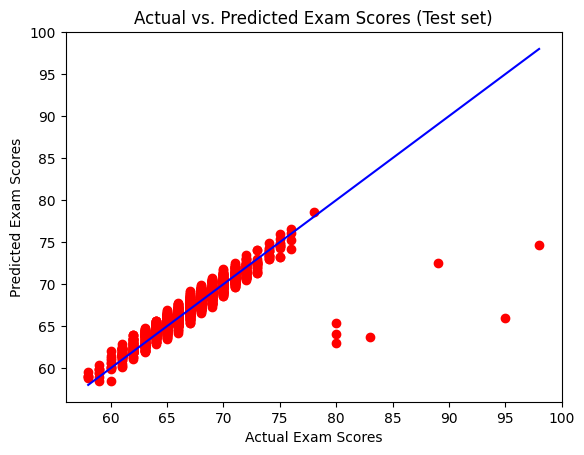

In [130]:
import matplotlib.pyplot as plt

# Visualize the results by plotting actual vs. predicted values for the test set
plt.scatter(y_test2, y_pred2, color = 'red')
plt.title('Actual vs. Predicted Exam Scores (Test set)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
# Add a line representing perfect predictions (y=x)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color = 'blue')
plt.show()

##**Evaluation of the SLR2 model**

###**Root Mean Squared Error (RMSE) -SLR2 -**

In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
print(f"Root Mean Squared Error (RMSE): {rmse2}")

Root Mean Squared Error (RMSE): 1.6858129413788072


### **R² (Coefficient of Determination)**

In [132]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared2 = r2_score(y_test2, y_pred2)
print(f"R-squared: {r_squared2}")

R-squared: 0.7843869624909137


### **Interpretation**
**Comparison**

Error difference: 2.344 – 1.525 ≈ 0.82 points worse for Model 2.

Variance explained: Model 1 explains 24% more variation (82% vs. 58%).

Practical meaning: Model 1 predicts much closer to actual exam scores and captures the relationships in the data more effectively.

**Conclusion**
Model 1 is clearly superior. Model 2 still has some predictive power but is less reliable — likely due to fewer features